In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as kmeans
from sklearn import cluster, metrics
import matplotlib.pyplot as plt
data_le=pd.read_csv(r'C:\Users\\Cai\kmean_cluster\108109_cluster_kmean.csv')
#data_le_df_un=data_le.drop(['class'],axis=1)
title=data_le.columns
data_le=np.array(data_le)
dx=data_le


clusters = 10

distortions = []
scores = []
# K 值的範圍 (2~20)

iris_X = dx

from sklearn.metrics import silhouette_score

In [2]:
# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(iris_X)
    silhouette_avg = metrics.silhouette_score(iris_X, kmeans_fit.predict(dx))
    
    silhouette_avgs.append(silhouette_avg)
    


# ________________________

In [4]:
len_cl=[]
len_cl_1=[]

for i in range(len(silhouette_avgs)-1):
    len_cl.append(abs(silhouette_avgs[i]-silhouette_avgs[i+1]))
for i in range(len(len_cl)-1):
    len_cl_1.append(abs(len_cl[i]-len_cl[i+1]))    

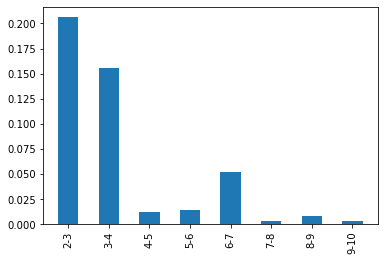

In [5]:
bb=['2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10']
plt.bar(bb,
        len_cl,
        width=0.5, 
        bottom=None, 
        align='center', 
       )
plt.xticks(rotation='vertical')
plt.show()


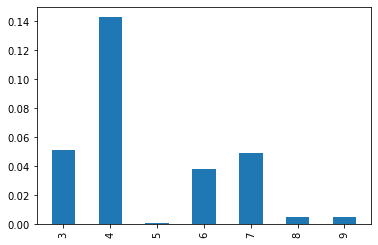

In [19]:
b=['3','4','5','6','7','8','9']
plt.bar(b,
        len_cl_1,
        width=0.5, 
        bottom=None, 
        align='center')
plt.xticks(rotation='vertical')
plt.show()
ca=[b,len_cl_1]

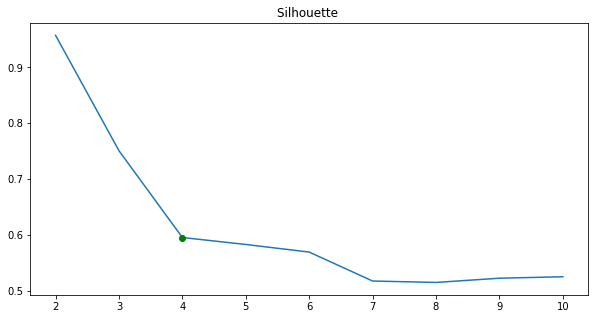

In [7]:
selected_K=int(b[np.argmax(len_cl_1)])

plt.figure(figsize=(10, 5))
plt.title('Silhouette ')
plt.xticks(ks)

plt.plot(ks, silhouette_avgs)
plt.plot(selected_K, silhouette_avgs[selected_K - 2], 'go') # 最佳解
plt.show()

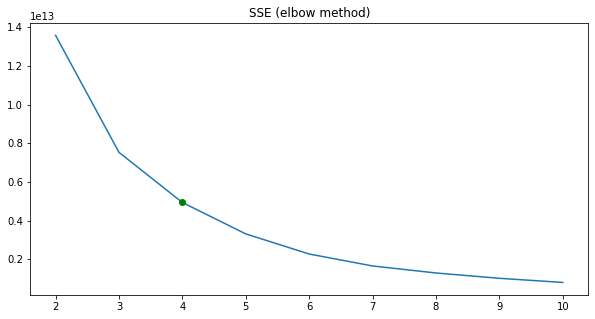

In [11]:
distortions = []

# 記錄每種 K 值建出的 KMeans 模型的成效
for i in ks:
    kmeans = KMeans(n_clusters=i).fit(dx)
    distortions.append(kmeans.inertia_) # 誤差平方和 (SSE)
    scores.append(silhouette_score(dx, kmeans.predict(dx))) # 側影係數
# 繪製誤差平方和圖 
#plt.subplot(223)
plt.figure(figsize=(10, 5))
plt.title('SSE (elbow method)')
plt.xticks(range(2,21))
plt.plot(ks, distortions)
plt.plot(selected_K, distortions[selected_K - 2], 'go') # 最佳解